In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from jupyterthemes import jtplot
jtplot.style()

In [2]:
class Operation():
    def __init__(self, input_nodes=[]):
        self.input_nodes = input_nodes
        self.output_nodes = []
        
        for node in input_nodes:
            node.output_nodes.append(self)
            
        _default_graph.operations.append(self)
            
    def comput(self):
        pass

In [3]:
class add(Operation):
    def __init__(self, x, y):
        super().__init__([x,y])
        
    def compute(self, x_var, y_var):
        self.inputs = [x_var, y_var]
        return x_var + y_var

In [4]:
class multiply(Operation):
    def __init__(self, x, y):
        super().__init__([x,y])
        
    def compute(self, x_var, y_var):
        self.inputs = [x_var, y_var]
        return x_var * y_var

In [5]:
class matmul(Operation):
    def __init__(self, x, y):
        super().__init__([x,y])
        
    def compute(self, x_var, y_var):
        self.inputs = [x_var, y_var]
        return x_var.dot(y_var)

class Sigmoid(Operation):
    def __init__(self, z):
        super().__init([z])
    def compute(self, z_val):
        return 1 / (1 + np.exp(-z_val))

In [6]:
class Placeholder():
    def __init__(self):
        self.output_nodes = []
        
        _default_graph.placeholders.append(self)

In [7]:
class Variable():
    def __init__(self, initial_value=None):
        self.value = initial_value
        self.output_nodes = []
        
        _default_graph.variables.append(self)

In [8]:
class Graph():
    
    def __init__(self):
        self.operations = []
        self.placeholders = []
        self.variables = []
        
    def set_as_default(self):
        global _default_graph
        _default_graph = self

z = Ax + b

A = 10

b = 1

z = 10x + 1

In [9]:
def traverse_postorder(operation):
    nodes_postorder = []
    
    def recurse(node):
        if isinstance(node, Operation):
            for input_node in node.input_nodes:
                recurse(input_node)
        nodes_postorder.append(node)
    
    recurse(operation)
    return nodes_postorder

In [10]:
class Session():
    
    def run(self, operation, feed_dict={}):
        for node in traverse_postorder(operation):
            if isinstance(node, Placeholder):
                node.output = feed_dict[node]
            elif isinstance(node, Variable):
                node.output = node.value
            else: #Operation
                node.inputs = [input_node.output for input_node in node.input_nodes]
                node.output = node.compute(*node.inputs)

            if type(node.output) == list:
                node.output = np.array(node.output)
        return operation.output

In [11]:
g = Graph()
g.set_as_default()

A = Variable(10)
b = Variable(1)
x = Placeholder()

y = multiply(A, x)
z = add(y, b)

In [12]:
for node in traverse_postorder(z):
    if isinstance(node, Variable):
        print(node, node.value)
    else:
        print(node)

<__main__.Variable object at 0x1192a99e8> 10
<__main__.Variable object at 0x1192a96a0> 1


In [13]:
sess = Session()
result = sess.run(operation=z, feed_dict={x:10})
result

101

In [14]:
g = Graph()
g.set_as_default()

A = Variable([[10, 20],[30,40]])
b = Variable([1,1])

x = Placeholder()

y = matmul(A,x)
z = add(y,b)

In [15]:
Sess = Session()
sess.run(z, {x:10})

array([[101, 201],
       [301, 401]])

# Classification


## Activation Function

In [16]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

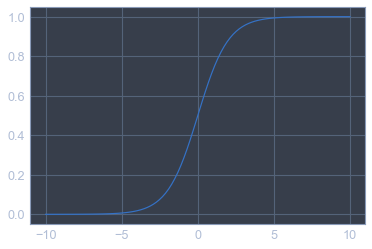

In [17]:
sample_z = np.linspace(-10, 10, 100)
sample_a = sigmoid(sample_z)
plt.plot(sample_z, sample_a)

In [18]:
data = make_blobs(n_samples=50, n_features=2,centers=2,random_state=75)

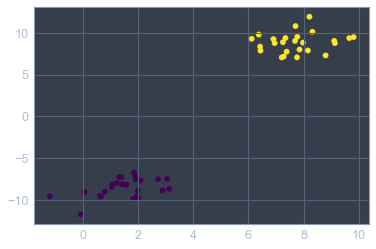

In [19]:
features = data[0]
lables = data[1]
plt.scatter(features[:, 0], features[:,1],c=lables)

In [20]:
features[:, 0]

array([ 7.3402781 ,  9.13332743,  1.99243535,  7.38443759,  7.97613887,
        7.76974352,  8.3186688 ,  8.79588546,  9.81270381,  1.57961049,
        0.06441546,  7.2075117 ,  9.10704928,  1.82921897,  7.85036314,
        3.04605603,  1.85582689,  2.88603902, -1.20046211,  2.00890845,
        7.68945113,  6.42356167,  8.15467319,  1.92000795,  1.90073973,
        7.7605855 ,  6.90561582,  0.65582768,  1.41804346,  9.65371965,
        1.23053506,  1.96322881,  6.11644251,  7.70630321,  0.79580385,
        3.13114921,  1.3970852 ,  7.27808709,  1.06965742,  6.37298915,
        7.24898455,  2.09335725,  1.05865542,  6.43807502,  6.94948313,
       -0.07326715,  0.61463602,  1.31977821,  2.72532584,  8.20949206])

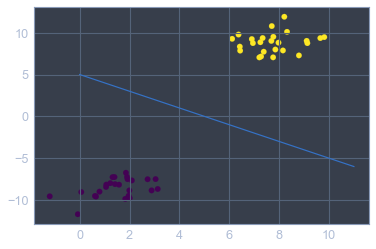

In [21]:
x = np.linspace(0, 11, 10)
y = - x + 5
plt.scatter(features[:, 0], features[:,1],c=lables)
plt.plot(x, y)

(1,1)  * f - 5 = 0

In [26]:
x = np.array([[1,2,3],[4,5,6],[7,8,9]])

In [33]:
x

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [29]:
np.array([1,1]).dot(np.array([[8],[10]])) - 5

array([13])

In [30]:
np.array([1,1]).dot(np.array([[0],[-10]])) - 5

array([-15])

In [36]:
np.array([1,1]).dot(np.array([[1],[1]]))

array([2])

In [34]:
np.array([1,1])

array([1, 1])

In [35]:
np.array([[1], [1]])

array([[1],
       [1]])